In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        fileNamePath=os.path.join(dirname, filename)
        print(fileNamePath)
        data=pd.read_csv(fileNamePath,header=0)
#print(data.describe())
data=data.fillna(data.mean())
data["cat"]=pd.cut(data["quality"], bins=[0,5,10],labels=["bad","good"])
data=data.drop(["quality","type"], axis = 1)
y=data["cat"]
x=data.drop(["cat"], axis = 1)
#print(data.columns)
#data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
#x_train
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv


In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [15]:
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
#print(clf.predict_proba(x_test))

1.0
0.8484615384615385


In [16]:
#!pip install lime
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(x_train.to_numpy(),feature_names=data.columns, 
                                 feature_selection= "auto",
                                 class_names=["bad","good"], 
                                 verbose=True,mode="classification",
                                 kernel_width=None,discretize_continuous=True)
     

In [17]:
i = 10
print(y_test.to_numpy()[i])
exp = explainer.explain_instance(x_test.to_numpy()[i], 
                                 clf.predict_proba)      
exp.show_in_notebook()

good
Intercept 0.5116047027426865
Prediction_local [0.71275472]
Right: 0.66


In [18]:
import shap
shap.initjs()
explainer =shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_train)

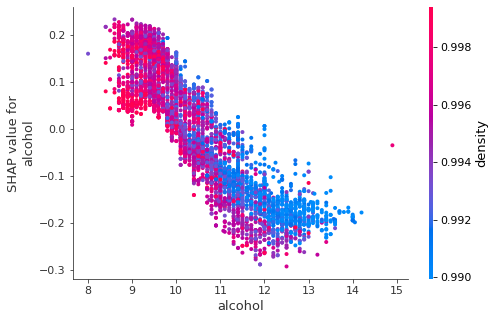

In [19]:
shap.dependence_plot("alcohol", shap_values[0], x_train)

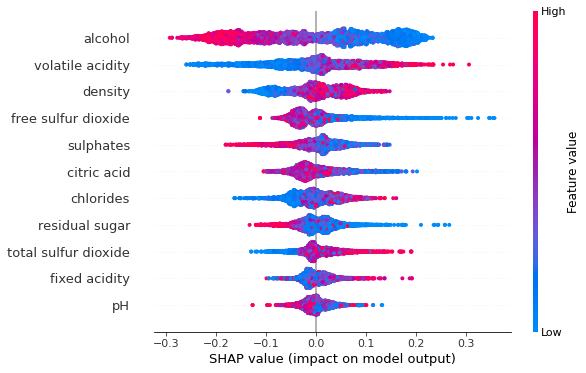

In [20]:

shap.summary_plot(shap_values[0], x_train)

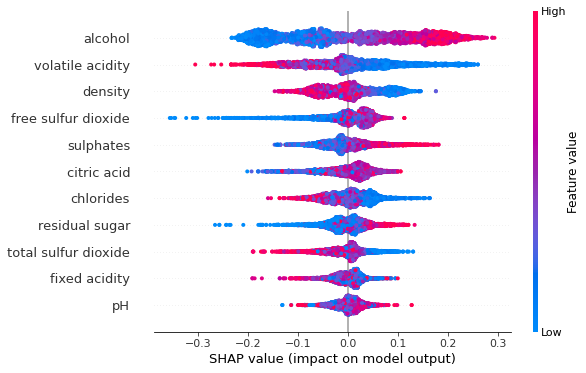

In [21]:
shap.summary_plot(shap_values[1], x_train)

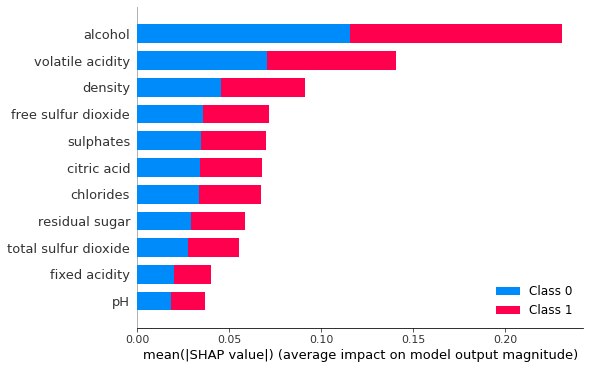

In [22]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

In [23]:
shap_values = explainer.shap_values(x_test.iloc[0:])
shap.force_plot(explainer.expected_value[0], 
                shap_values[0], 
                x_test.iloc[0:])